# Importing the packages

In [1]:
pip install yfinance --upgrade --no-cache-dir 

Note: you may need to restart the kernel to use updated packages.


In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from statsmodels.tsa.stattools import adfuller, kpss, acf, acovf, pacf
import datetime as dt

from statsmodels.stats.diagnostic import acorr_ljungbox, het_arch
from statsmodels.tools.eval_measures import rmse, meanabs

import seaborn as sns
from statsmodels.stats.diagnostic import het_arch

In [13]:
NASDAQ = yf.download("^IXIC", interval='5m', start="2025-01-01", end="2025-02-19")

[*********************100%***********************]  1 of 1 completed


In [14]:
NASDAQ.head()

Price,Close,High,Low,Open,Volume
Ticker,^IXIC,^IXIC,^IXIC,^IXIC,^IXIC
Datetime,,,,,
2025-01-02 14:30:00+00:00,19357.183594,19446.115234,19357.183594,19401.283203,0
2025-01-02 14:35:00+00:00,19281.269531,19354.326172,19280.431641,19354.326172,193156000
2025-01-02 14:40:00+00:00,19307.628906,19323.042969,19270.119141,19270.119141,173848000
2025-01-02 14:45:00+00:00,19388.388672,19388.388672,19310.218750,19310.218750,169021000
2025-01-02 14:50:00+00:00,19452.576172,19452.576172,19385.427734,19388.869141,152123000


In [15]:
NASDAQ.shape

(2418, 5)

In [54]:
type(NASDAQ['Adj Close'])

pandas.core.series.Series

In [16]:
NASDAQ.to_csv("NASDAQ_5m_2418obs.csv", sep=",")

In [17]:
NASDAQ = pd.read_csv("NASDAQ_5m_2418obs.csv", sep=",")
NASDAQ.head()

,Close
0,19357.183594
1,19281.269531
2,19307.628906
3,19388.388672
4,19452.576172


In [18]:
NASDAQ.head(10)
NASDAQ.columns

Index(['Close'], dtype='object')

In [20]:
NASDAQ.index = pd.date_range(start="2025-01-02 14:30:00+00:00", periods=len(NASDAQ), freq="5min")
NASDAQ.head(10)

,Close
2025-01-02 14:30:00+00:00,19357.183594
2025-01-02 14:35:00+00:00,19281.269531
2025-01-02 14:40:00+00:00,19307.628906
2025-01-02 14:45:00+00:00,19388.388672
2025-01-02 14:50:00+00:00,19452.576172
2025-01-02 14:55:00+00:00,19465.230469
2025-01-02 15:00:00+00:00,19485.447266
2025-01-02 15:05:00+00:00,19502.697266
2025-01-02 15:10:00+00:00,19507.923828
2025-01-02 15:15:00+00:00,19452.986328


In [22]:
NASDAQ['return_NASDAQ'] = (np.log(NASDAQ['Close'])-np.log(NASDAQ['Close'].shift(1)))*100
NASDAQ.head(10)

,Close,return_NASDAQ
2025-01-02 14:30:00+00:00,19357.183594,NaN
2025-01-02 14:35:00+00:00,19281.269531,-0.392946
2025-01-02 14:40:00+00:00,19307.628906,0.136616
2025-01-02 14:45:00+00:00,19388.388672,0.417407
2025-01-02 14:50:00+00:00,19452.576172,0.330515
2025-01-02 14:55:00+00:00,19465.230469,0.065031
2025-01-02 15:00:00+00:00,19485.447266,0.103807
2025-01-02 15:05:00+00:00,19502.697266,0.088488
2025-01-02 15:10:00+00:00,19507.923828,0.026796
2025-01-02 15:15:00+00:00,19452.986328,-0.282014


<Axes: >

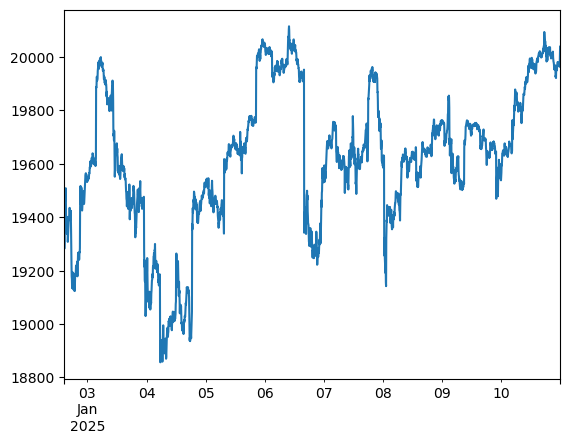

In [27]:
NASDAQ['Close'].plot()

<Axes: >

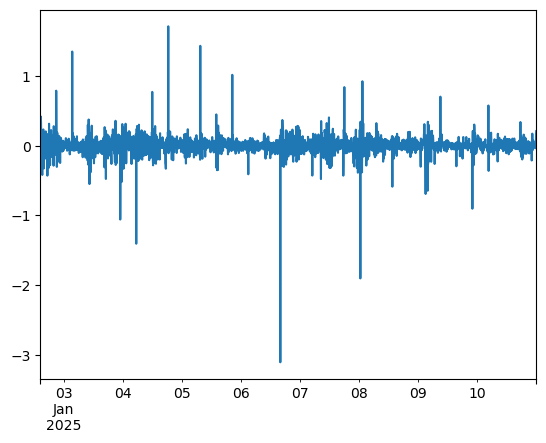

In [28]:
NASDAQ['return_NASDAQ'].plot()

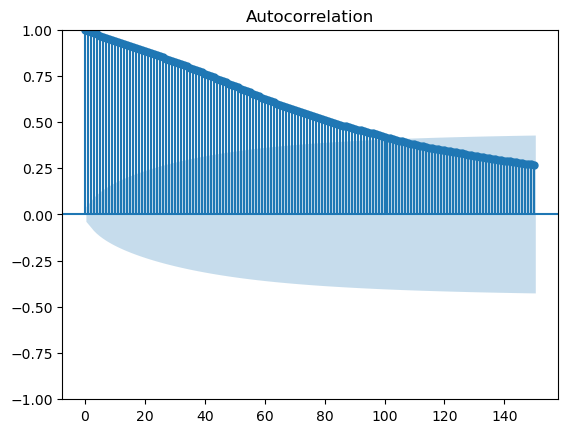

In [41]:
NDX= NASDAQ['Close'].dropna()
plot_acf(NDX,  alpha=.05, lags=150)
plt.show()

In [42]:
coef_ac, confid_int = acf(NDX, nlags=30, alpha=.05)
confid_int

array([[1.        , 1.        ],
       [0.95340682, 1.03312363],
       [0.91823288, 1.05568723],
       [0.89220794, 1.06905232],
       [0.87006953, 1.07862619],
       [0.85050329, 1.08621865],
       [0.83286646, 1.09263512],
       [0.81593342, 1.09746512],
       [0.79973246, 1.10121679],
       [0.78435002, 1.10431037],
       [0.76912856, 1.10633544],
       [0.75513876, 1.10852878],
       [0.7416261 , 1.11029991],
       [0.72876598, 1.11193387],
       [0.71647073, 1.1134382 ],
       [0.70474495, 1.11489476],
       [0.69369057, 1.1164712 ],
       [0.68278105, 1.11770031],
       [0.67148801, 1.11809186],
       [0.66017173, 1.11802638],
       [0.64911927, 1.11781719],
       [0.63849727, 1.11766085],
       [0.62796619, 1.11724839],
       [0.61773586, 1.11680968],
       [0.60717237, 1.11573339],
       [0.59674823, 1.11449921],
       [0.58614452, 1.1128044 ],
       [0.57597536, 1.11127146],
       [0.56613083, 1.10981025],
       [0.55612272, 1.10794868],
       [0.

In [43]:
for q, element in enumerate(coef_ac):
    if confid_int[q, 0] <= 0 <= confid_int[q, 1]:
        print(q-1)
        break

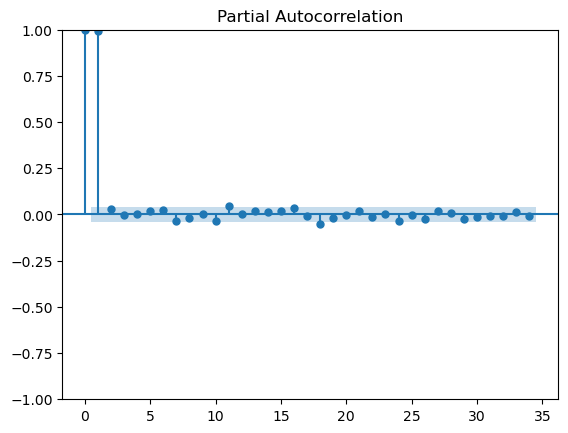

In [34]:
plot_pacf(NASDAQ['Close'],  alpha=.05)
plt.show()

In [42]:
coef_pac, confid_int_pac = pacf(NDX, nlags=10, alpha=.05)

for p, element in enumerate(coef_pac):
    if confid_int_pac[p, 0] <= 0 <= confid_int_pac[p, 1]:
        print(p-1)
        break

0


In [15]:
type(NDX)

pandas.core.series.Series

In [16]:
NASDAQ['date_column'] = pd.to_datetime(NASDAQ['date_column'])  # Convertir en datetime
NASDAQ.set_index('date_column', inplace=True)
NASDAQ = NASDAQ.asfreq('D')  # Assurer une fréquence journalière

KeyError: 'date_column'

In [266]:
NASDAQ.colums()

AttributeError: 'Series' object has no attribute 'colums'

In [45]:
NASD['date_column'])
NA.set_index('date_column', inplace=True)
NA = NA.asfreq('D') 

SyntaxError: unmatched ')' (2527050104.py, line 1)

In [74]:
#NASDAQ[('Adj Close', '^IXIC')] = NASDAQ
result_dict = {}
for p in [0,1]:
    for q in [0,1,2,3,4]:
        if (p != 0 or q != 0):
            arma_mod = ARIMA(endog=NDX, order=(p,0, q))
            fitx = arma_mod.fit()
            result_dict["ARMA_%s%s" % (p, q)] = fitx

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [45]:
adf_test = adfuller(NDX.dropna())  # On enlève les NaN
print(f"Statistique ADF : {adf_test[0]}")
print(f"P-value : {adf_test[1]}")

if adf_test[1] < 0.05:
    print("✅ La série est stationnaire.")
else:
    print("❌ La série n'est pas stationnaire, il faut peut-être différencier encore.")

Statistique ADF : -2.432381322418812
P-value : 0.13280478107746563
❌ La série n'est pas stationnaire, il faut peut-être différencier encore.


NameError: name 'X' is not defined

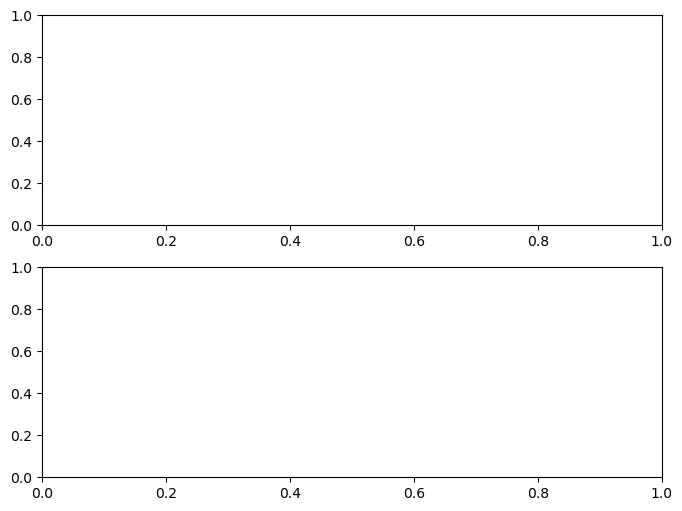

In [17]:
fig, ax = plt.subplots(2, 1, figsize=(8, 6))
plot_acf(X, ax=ax[0])
plot_pacf(X, ax=ax[1])
plt.show()

In [18]:
X = NASDAQ['Adj Close'].diff().dropna()
X.head()

2025-01-23 00:01:00     7.375000
2025-01-23 00:02:00    -3.171875
2025-01-23 00:03:00    16.250000
2025-01-23 00:04:00     7.349609
2025-01-23 00:05:00    10.906250
Freq: min, Name: Adj Close, dtype: float64

In [47]:
model = sm.tsa.ARIMA(X, order=(1, 1, 1))  
fit_model = model.fit()
print(fit_model.summary())

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:              Adj Close   No. Observations:                  358
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1075.303
Date:                Wed, 19 Feb 2025   AIC                           2156.605
Time:                        17:24:24   BIC                           2168.238
Sample:                    01-23-2025   HQIC                          2161.232
                         - 01-23-2025                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0898      0.042      2.119      0.034       0.007       0.173
ma.L1         -0.9999      1.870     -0.535      0.593      -4.666       2.666
sigma2        23.8146     44.372      0.537      0.5

In [47]:
from arch import arch_model

# Modèle GARCH(1,1)
garch_model = arch_model(NDX, vol='Garch', p=1, q=1)
garch_fit = garch_model.fit()
print(garch_fit.summary())

Iteration:      1,   Func. Count:      6,   Neg. LLF: 71500.01419734907
Iteration:      2,   Func. Count:     12,   Neg. LLF: 15482.205767133446
Iteration:      3,   Func. Count:     17,   Neg. LLF: 15463.700031516157
Iteration:      4,   Func. Count:     22,   Neg. LLF: 15461.912230587779
Iteration:      5,   Func. Count:     27,   Neg. LLF: 15460.828873134571
Iteration:      6,   Func. Count:     32,   Neg. LLF: 15459.902094007943
Iteration:      7,   Func. Count:     37,   Neg. LLF: 15459.887181039536
Iteration:      8,   Func. Count:     42,   Neg. LLF: 15459.884114903885
Iteration:      9,   Func. Count:     47,   Neg. LLF: 15459.867565921502
Iteration:     10,   Func. Count:     52,   Neg. LLF: 15459.784413275225
Iteration:     11,   Func. Count:     57,   Neg. LLF: 15459.370058198027
Iteration:     12,   Func. Count:     62,   Neg. LLF: 15457.321526181764
Iteration:     13,   Func. Count:     67,   Neg. LLF: 15447.766229577192
Iteration:     14,   Func. Count:     72,   Neg. LLF

C:\ProgramData\anaconda3\Lib\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 7.364e+04. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 0.1 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


In [46]:
returns_scaled = NDX * 10  # ou * 100
garch_model_scaled = arch_model(returns_scaled, vol='Garch', p=1, q=2,dist='t')
garch_fit_scaled = garch_model_scaled.fit()
print(garch_fit_scaled.summary())

NameError: name 'arch_model' is not defined

In [48]:
NDX_S = NDX * 100
egarch_model = arch_model(NDX_S, vol='EGARCH', p=1, q=1, dist='t')
egarch_fit = egarch_model.fit()
print(egarch_fit.summary())

Iteration:      1,   Func. Count:      7,   Neg. LLF: 43026.85457732303
Iteration:      2,   Func. Count:     14,   Neg. LLF: 43026.854576326004
Iteration:      3,   Func. Count:     21,   Neg. LLF: 43839.466076665645
Iteration:      4,   Func. Count:     28,   Neg. LLF: 46044.41254662542
Iteration:      5,   Func. Count:     35,   Neg. LLF: 51371.960752917745
Iteration:      6,   Func. Count:     48,   Neg. LLF: 51367.52570389659
Iteration:      7,   Func. Count:     63,   Neg. LLF: 28844.838791448346
Inequality constraints incompatible    (Exit mode 4)
            Current function value: 28844.838791226422
            Iterations: 8
            Function evaluations: 63
            Gradient evaluations: 7
                        Constant Mean - EGARCH Model Results                        
Dep. Variable:                        Close   R-squared:                       0.000
Mean Model:                   Constant Mean   Adj. R-squared:                  0.000
Vol Model:                    

C:\ProgramData\anaconda3\Lib\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 7.364e+08. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 0.001 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\arch\univariate\base.py:768: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


In [ ]:
pd.read